In [1155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1156]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1157]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1158]:
data.shape

(891, 12)

In [1159]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1161]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are missing values in featurees Age and Cabin.
Pclass,sibsp,parch, fare is right skewed
survved column is categorical let exclude them here
Lets exploree each featurees in EDA section

# EDA:

<AxesSubplot:>

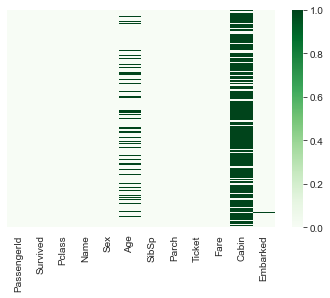

In [1162]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='Greens')

There are missing values in feature Age and Cabin.        
cabin column can be either dropped or it can be changed to categorical feature as Cabin is known(1) or not known(0).

In [1163]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

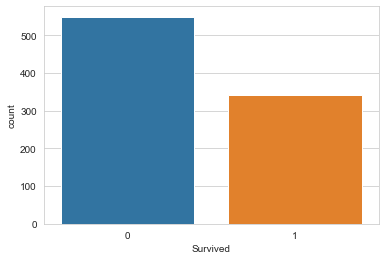

In [1164]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=data)

Data is imbalanced as the target feature is imbalanced. i.e, more than 500 data or in 0 category and 300 are in 1 category., we will balnce the data using SMOTE in data preprocessing

<AxesSubplot:xlabel='Pclass', ylabel='count'>

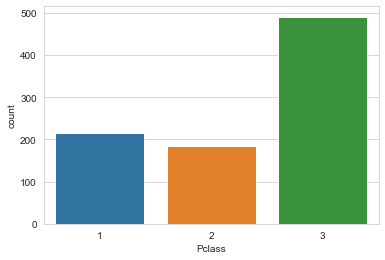

In [1165]:
sns.set_style("whitegrid")
sns.countplot(x='Pclass',data=data)

most of the data falls under Pclass 3.i.e., more than 450        
least of the data falls under Pclass 1.i.e., less than 200        
nearly 200 data falls under Pclass 2


<AxesSubplot:xlabel='Sex', ylabel='count'>

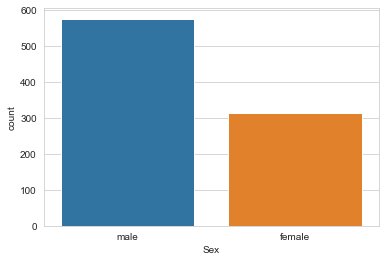

In [1166]:
sns.set_style("whitegrid")
sns.countplot(x='Sex',data=data)

mor than 550 passengers were male         
nearly 300 passsengers were female

<AxesSubplot:xlabel='Age', ylabel='Density'>

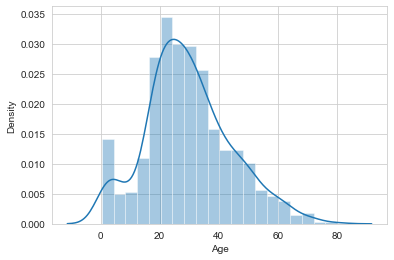

In [1167]:
sns.distplot(data['Age'].dropna(),bins=20)

Age feature is not normally distributed., we will correct them in feature engineering section

<AxesSubplot:xlabel='SibSp', ylabel='count'>

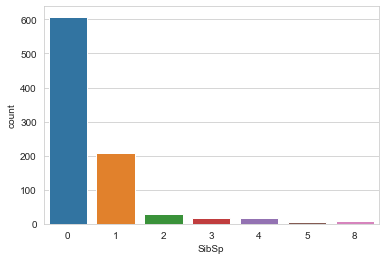

In [1168]:
sns.countplot(x='SibSp', data=data)

nearly 600 passengers travelled without Siblings or spouse          
nearly 200 passengers travelled with 1 Siblings or spouse             
maximum siblings or spouse of a passenger is 8

<AxesSubplot:xlabel='Parch', ylabel='count'>

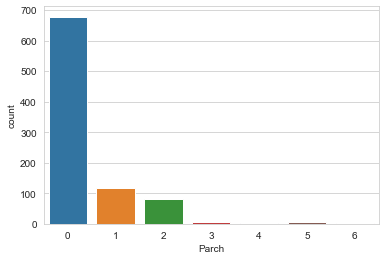

In [1169]:
sns.countplot(x='Parch', data=data)

nearly 650 passengers falls under 0 parch      
more than 100 passengers falls undr 1 parch       
maximum parch of  passengers is 6  

<AxesSubplot:xlabel='Fare', ylabel='Density'>

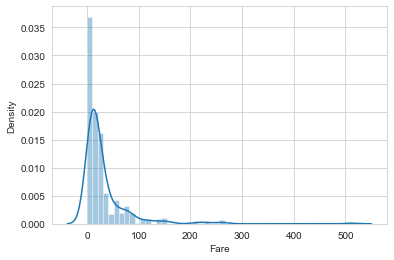

In [1170]:
sns.distplot(data['Fare'])

Fare is right skewwed and ther are outliers          
maximu range falls under 0 to 100

In [1171]:
data['Cabin'].isnull().sum()

687

cabin feature has 687 NaN values which is more than 70% of data

In [1172]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Embarked has 2 NaN values, we will fix them in feature engineering

<AxesSubplot:xlabel='Embarked', ylabel='count'>

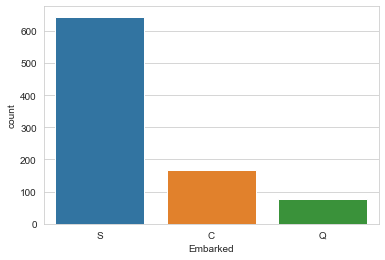

In [1173]:
sns.countplot(x='Embarked',data=data)

nearly 650 passengers fall under embarked S,,,      150 passengers under C      and nearly 75 falls under Q

# BIVARIATE ANALYSIS:

In [1174]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

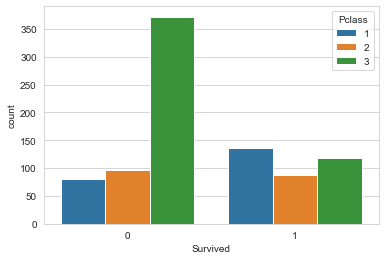

In [1175]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

Passengers in 3rd class survived more    
passengers in class 1 passengers survived the least

<AxesSubplot:xlabel='Survived', ylabel='count'>

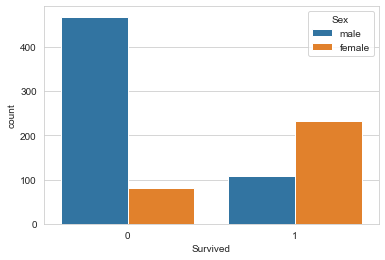

In [1176]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

Female passengers survived the most and         
Male passengers survived less

<AxesSubplot:xlabel='SibSp', ylabel='count'>

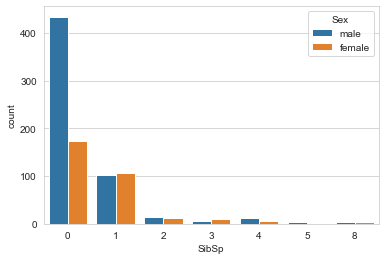

In [1177]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Sex',data=data)

male passengers with 0 sibilings/spouse are more than 400
Female passengers with 0 sibilings/spouse are nearly 200

<AxesSubplot:xlabel='Survived', ylabel='Age'>

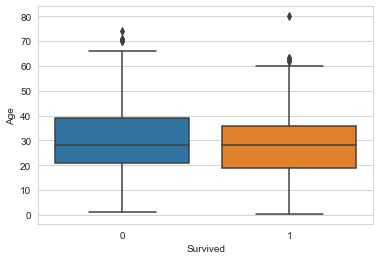

In [1178]:
sns.set_style('whitegrid')
sns.boxplot(x='Survived',y='Age',data=data)

there are some outliers in Age feature based on survival status, mean of both the status of Age feature is 39

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

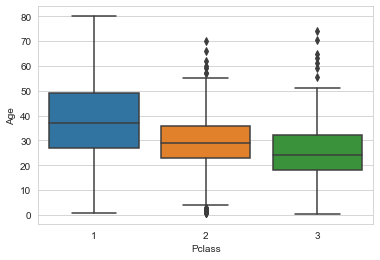

In [1179]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=data)

there are some relationship with between Age and Pclass        
Class 1 passengers age donot have outliers  and the average is 39        
Class 2 passengers age has outliers and mean age of class 2 is 29        
Class 3 passengers age has outliers and mean age of class 2 is 24        

<AxesSubplot:xlabel='Parch', ylabel='count'>

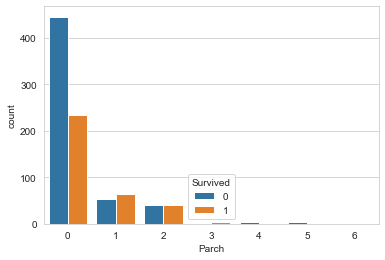

In [1180]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Survived',data=data)

Survived rate in Parch 0 is high in the given data

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

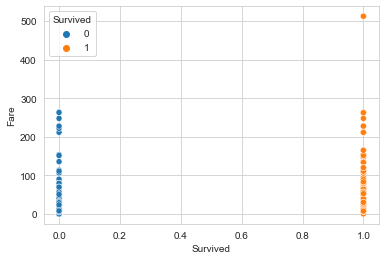

In [1181]:
sns.set_style('whitegrid')
sns.scatterplot(x='Survived',y='Fare', hue='Survived',data=data)

Fare dooes not have much impact on survival feature but there are outliers in survival category 1 and fare

<AxesSubplot:xlabel='Embarked', ylabel='count'>

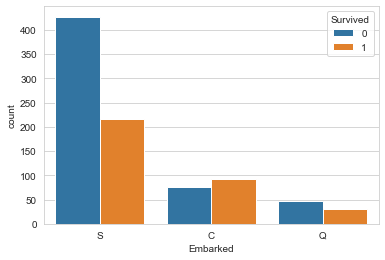

In [1182]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Survived',data=data)

Survival rate is high with Embarked S          
Survival rate is Low with Embarked Q

# Multivariate Analysis

<AxesSubplot:>

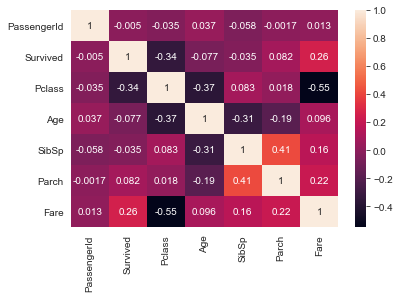

In [1183]:
sns.heatmap(data.corr(),annot=True)

Observations:
    1. Survived feature is highly correlated with  Parch feature
    2. Fare and Pclass is negatively correlated with Fare
    3. SibSp and Pclass features are highly correlated
    4. Age and survived is negatively correlated with Survived feature

# Feature engineering:

Lets handle the missing values

In [1184]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since age had impact with the Pclass., lets fix the outliers based on mean of each Pclass

In [1185]:
def age_imputation(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

now lets impute the NA in age feature using the average imputation

In [1186]:
data['Age']=data[['Age','Pclass']].apply(age_imputation,axis=1)

In [1187]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can drop the feature Cabin as more than 80% data is missing

In [1188]:
data=data.drop('Cabin', axis=1)

In [1189]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [1190]:
embarked_mode=data['Embarked'].mode()[0]
embarked_mode

'S'

In [1191]:
data['Embarked']=data['Embarked'].replace(np.NaN,embarked_mode)

In [1192]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now the missing values are removed, now lets check for outliers

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

<Figure size 1440x4320 with 0 Axes>

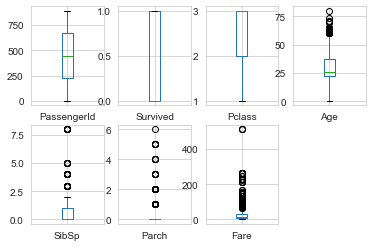

In [1193]:
plt.figure(figsize=(20,60))
data.plot(kind='box',subplots=True,layout=(2,4))

there are outliers in featurees Age,SibSp,Parch and Fare

In [1194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


we will remove outliers using IQR function since Zscore will not impact feature with int data type

In [1195]:
def iqrfunction(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    print("Q1 is: ",q1)
    print("Q3 is :",q3)
    print("IQR is ",IQR)
    lower_limit=q1-(1.5*IQR)
    higher_limit=q3+(1.5*IQR)
    print("lower range is ",lower_limit)
    print("Higher rnge is ",higher_limit)
    data[feature]=np.where(data[feature]<lower_limit,lower_limit,data[feature])
    data[feature]=np.where(data[feature]>higher_limit,higher_limit,data[feature])
    data[feature].plot.box()

Q1 is:  22.0
Q3 is : 37.0
IQR is  15.0
lower range is  -0.5
Higher rnge is  59.5


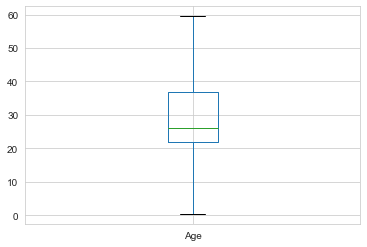

In [1196]:
iqrfunction('Age')

Q1 is:  0.0
Q3 is : 1.0
IQR is  1.0
lower range is  -1.5
Higher rnge is  2.5


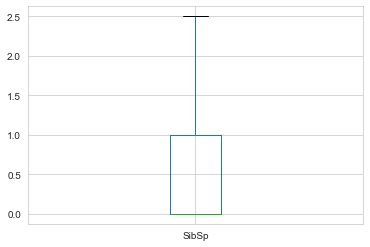

In [1197]:
iqrfunction('SibSp')

Q1 is:  7.9104
Q3 is : 31.0
IQR is  23.0896
lower range is  -26.724
Higher rnge is  65.6344


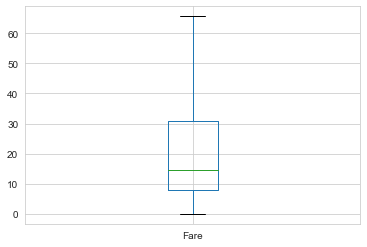

In [1198]:
iqrfunction('Fare')

Q1 is:  0.0
Q3 is : 0.0
IQR is  0.0
lower range is  0.0
Higher rnge is  0.0


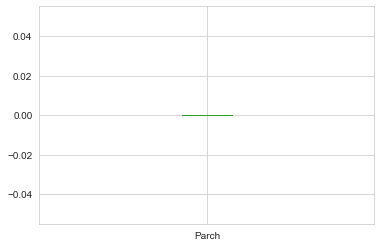

In [1199]:
iqrfunction('Parch')

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

<Figure size 1440x4320 with 0 Axes>

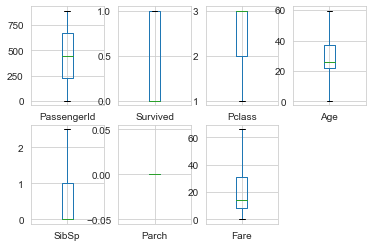

In [1200]:
plt.figure(figsize=(20,60))
data.plot(kind='box',subplots=True,layout=(2,4))

In [1201]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
PassengerId,0.000000,-1.200000
Survived,0.478523,-1.775005
Pclass,-0.630548,-1.280015
Age,0.346407,0.208992
SibSp,1.621154,1.776476
Parch,0.000000,0.000000
Fare,1.082179,-0.248978


In [1202]:
data['Fare']=np.sqrt(data['Fare'])
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.346407
SibSp          1.621154
Parch          0.000000
Fare           0.582004
dtype: float64

In [1203]:
data['SibSp']=np.sqrt(data['SibSp'])
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.346407
SibSp          0.992526
Parch          0.000000
Fare           0.582004
dtype: float64

In [1204]:
data['SibSp']=np.log1p(data['SibSp'])
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.346407
SibSp          0.877366
Parch          0.000000
Fare           0.582004
dtype: float64

since log and sqrt transformation are not much effective lets perform power transformation on decrete features

In [1205]:
columns=data.columns
tran_columns=[]

In [1206]:
data_tran=pd.DataFrame()
for i in columns:
    print(data[i].dtype)
    if data[i].dtype=='int64':
        tran_columns.append(i)
        data_tran[i]=data[i]
    elif data[i].dtype=='float64':
        tran_columns.append(i)
        data_tran[i]=data[i]

data_tran.info()

int64
int64
int64
object
object
float64
float64
float64
object
float64
object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


In [1207]:
from sklearn.preprocessing import PowerTransformer

power=PowerTransformer()
data_tran=pd.DataFrame(power.fit_transform(data_tran),columns=data_tran.columns)
data_tran.skew()

PassengerId   -0.283201
Survived       0.478523
Pclass        -0.441438
Age            0.019152
SibSp          0.787065
Parch          0.000000
Fare           0.035021
dtype: float64

In [1208]:
for feature in tran_columns:
    data[feature]=data_tran[feature]
data.skew()    

PassengerId   -0.283201
Survived       0.478523
Pclass        -0.441438
Age            0.019152
SibSp          0.787065
Parch          0.000000
Fare           0.035021
dtype: float64

In [1209]:
 data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

skewness in all the featurees except sibSp feature after trying with all the transformation technique, lets pproceed with label encoding for categorical feature

In [1210]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data=data.apply(encoder.fit_transform)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,51,1,0,596,203,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,47,1,0,49,189,2
4,4,0,2,15,1,47,0,0,472,43,2


In [1211]:
## lets split the data for training and test

y=data.iloc[:,1:2]
x=data.drop('Survived',axis=1)
x.shape

(891, 10)

In [1212]:
y.shape

(891, 1)

In [1213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


In [1214]:
best_acc=0
best_random=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)    

Best Accuracy score is :  0.8547486033519553  and Random_state is :  99


Observation: accuracy of logistic regression is 85.47% with the random state 99 after hyper parameter tunning in random state, lets try with some other model to find the best fitting model for this problem statement

In [1215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=99)

In [1216]:
x.shape

(891, 10)

In [1217]:
y.shape

(891, 1)

lets split the data befor performing scaling technique to avoid over fitting and before splitting lets make the data set sa a balanced data set using SMOTE

In [1218]:
from imblearn.over_sampling import SMOTE

In [1219]:
y_train.value_counts()

Survived
0           436
1           276
dtype: int64

In [1222]:
x_train_os,y_train_os=SMOTE(random_state=99).fit_resample(x_train, y_train)
y_train_os.value_counts()

Survived
0           436
1           436
dtype: int64

Now the data set is balanced, ;ets perform standard scaler

In [1223]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [1224]:
#now lets fit the SC to x_test
x_test_scaled=scaler.transform(x_test)

In [1225]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train_os,y_train_os)
DT_pred=DT.predict(x_test)
print(accuracy_score(y_test,DT_pred))
print(confusion_matrix(y_test,DT_pred))

0.7150837988826816
[[86 27]
 [24 42]]


Decision tree model accuracy score is 71.50%, lets verify with ensemble techniques in order to create sub set from dataset and send them to to a model and get the mean of all output from all the models

In [1226]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [1227]:
ada=AdaBoostClassifier()
ada.fit(x_train_os,y_train_os)
adab_pred=ada.predict(x_test)
print(accuracy_score(y_test,adab_pred))
print(confusion_matrix(y_test,adab_pred))

0.7821229050279329
[[94 19]
 [20 46]]


Accuracy of ADA boost classifier is 78.21%

In [1228]:
RFC=RandomForestClassifier()
RFC.fit(x_train_os,y_train_os)
RFC_pred=RFC.predict(x_test)
print(accuracy_score(y_test,RFC_pred))
print(confusion_matrix(y_test,RFC_pred))

0.8379888268156425
[[101  12]
 [ 17  49]]


In [1229]:
from sklearn.svm import SVC

In [1230]:
svc =SVC()

svc.fit(x_train_os,y_train_os)
svc_pred=svc.predict(x_test)

print("SVC accuracy is : ",accuracy_score(y_test,svc_pred))
print("SVC confusion matrix : \n",confusion_matrix(y_test,svc_pred))
print("SVC classification report is: \n",classification_report(y_test,svc_pred))

SVC accuracy is :  0.659217877094972
SVC confusion matrix : 
 [[78 35]
 [26 40]]
SVC classification report is: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       113
           1       0.53      0.61      0.57        66

    accuracy                           0.66       179
   macro avg       0.64      0.65      0.64       179
weighted avg       0.67      0.66      0.66       179



In [ ]:
Accuracy of support vector classifier is 78.21%

In [1231]:
from sklearn.model_selection import cross_val_score

In [1232]:
print("Linear regression cross validation accuracy is :", cross_val_score(LR,x,y,cv=5).mean())

Linear regression cross validation accuracy is : 0.7845584081350825


In [1233]:
print("Decision tree cross validation accuracy is :", cross_val_score(DT,x,y,cv=5).mean())

Decision tree cross validation accuracy is : 0.7139853116565187


In [1234]:
print("ADA boost classifier cross validation accuracy is :", cross_val_score(ada,x,y,cv=5).mean())

ADA boost classifier cross validation accuracy is : 0.7262758144498148


In [1235]:
print("Random forest classifier cross validation accuracy is :", cross_val_score(RFC,x,y,cv=5).mean())

Random forest classifier cross validation accuracy is : 0.8249387985688281


In [1236]:
print("suport vector classifier cross validation accuracy is :", cross_val_score(svc,x,y,cv=5).mean())

suport vector classifier cross validation accuracy is : 0.6768313351327601


Random foerst classifier gives the best accuracy, lets pereform hypeer parameter tunning for Random forest classifier

In [1237]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],'n_estimators':[10,100],'class_weight':['balanced','balanced_subsample']}
gsc=GridSearchCV(RFC,parameters)
gsc.fit(x_train,y_train)
gsc

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 100]})

In [1238]:
gsc.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'n_estimators': 100}

In [1239]:
Final_mod=RandomForestClassifier(class_weight='balanced',criterion='entropy',n_estimators=100)
Final_mod.fit(x_train_os,y_train_os)
Final_mod_pred=RFC.predict(x_test)
print(accuracy_score(y_test,Final_mod_pred))
print(confusion_matrix(y_test,Final_mod_pred))

0.8379888268156425
[[101  12]
 [ 17  49]]


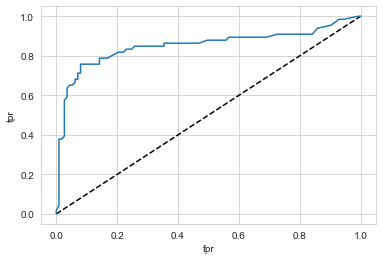

In [1240]:
from sklearn.metrics import roc_curve , roc_auc_score

y_pred_prob=Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,threshold =roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random forest Classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()


In [1241]:
import joblib

joblib.dump(Final_mod,'final_model.pkl')

['final_model.pkl']